In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [6]:
#load the images in testimages folder
img1 = cv2.imread('testimages/fishing_boat.bmp')
img2 = cv2.imread('testimages/nature.bmp')

1 a) Displaying Images in grayscale

(200, 192)


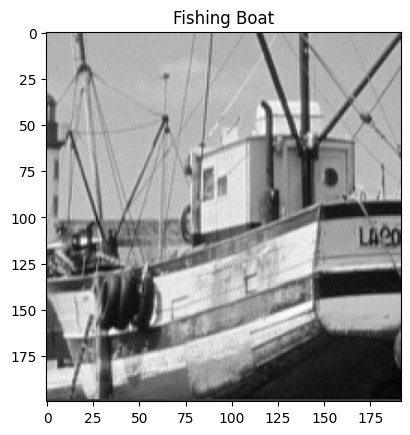

(512, 640)


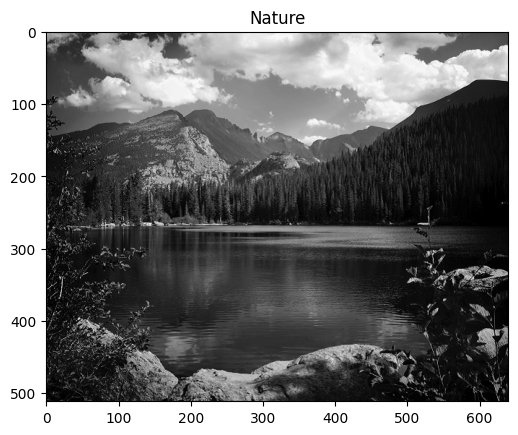

In [7]:
#display images in grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#size of the image
print(img1_gray.shape)
plt.imshow(img1_gray, cmap='gray')
plt.title('Fishing Boat')
plt.show()

img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#size of the image
print(img2_gray.shape)
plt.imshow(img2_gray, cmap='gray')
plt.title('Nature')
plt.show()

1 b) Display the 8×8 block (chip) with the top-left pixel at (x, y) = (x∗, y∗)

In [8]:
#Calculating the values of x* and y*
x_star = 8 *(4 - 1) + 1
y_star = 8 *(9 - 1) + 1

#Adjusting for 0 indexing
x_star = x_star - 1
y_star = y_star - 1

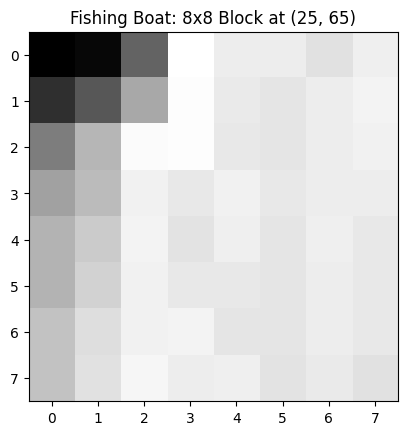

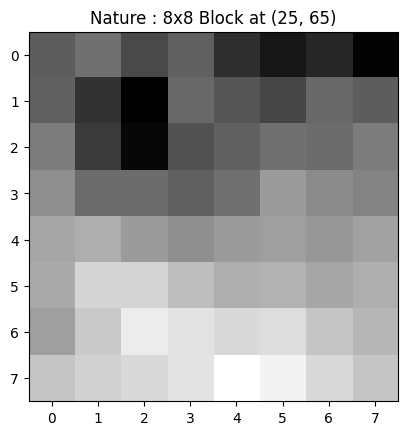

In [9]:
# Display the 8×8 block (chip) with the top-left pixel at (x, y) = (x∗, y∗) for each image
chip1 = img1_gray[x_star:x_star+8,y_star:y_star+8]
chip2 = img2_gray[x_star:x_star+8,y_star:y_star+8]
plt.imshow(chip1, cmap='gray')
plt.title(f"Fishing Boat: 8x8 Block at ({x_star+1}, {y_star+1})")
plt.show()
plt.imshow(chip2, cmap='gray')
plt.title(f"Nature : 8x8 Block at ({x_star+1}, {y_star+1})")
plt.show()

1 c) Display your 8×8 block (chip) with S = 50 sensed pixel

In [10]:
#Function to corrupt the 8x8 block with contrasting color

def corrupt_chip(chip, S):
    # Convert chip to float type to support NaN
    chip = chip.astype(float)

    # Total pixels in the block
    total_pixels = 64

    # Ensure S is within the possible range
    S = max(0, min(S, total_pixels))

    # Corrupt (total_pixels - S) pixels
    corrupt_indices = np.random.choice(total_pixels, total_pixels - S, replace=False)
    for index in corrupt_indices:
        x, y = divmod(index, 8)
        chip[x, y] = np.nan  # Set the pixel to NaN

    return chip



[[ 92  95 134 200 192 192 187 193]
 [112 129 163 199 191 189 192 195]
 [145 169 198 199 190 189 192 194]
 [160 171 194 190 194 190 192 192]
 [168 178 195 188 193 189 193 190]
 [168 181 194 190 190 189 192 190]
 [174 186 194 195 189 189 192 190]
 [174 187 196 192 193 188 191 187]]


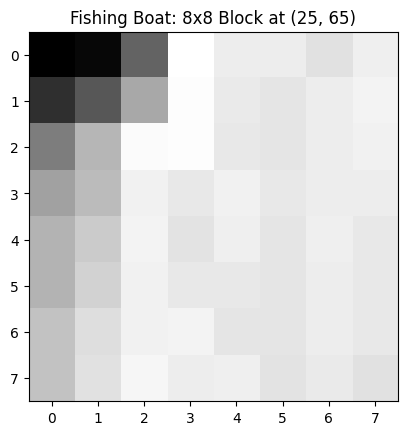

[[ nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan 199.  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan 192.  nan]
 [160. 171. 194.  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan 190.  nan 189.  nan  nan]
 [ nan  nan  nan  nan 189.  nan  nan  nan]
 [174. 187.  nan  nan  nan  nan  nan  nan]]


Text(0.5, 1.0, 'Corrupted Chip Fishing boat')

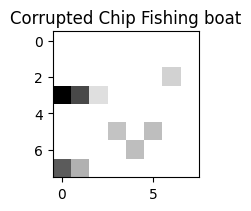

In [16]:
# Assuming 'chip1' is the original 8x8 block
x_star = 8 *(4 - 1) + 1
y_star = 8 *(9 - 1) + 1

#Adjusting for 0 indexing
x_star = x_star - 1
y_star = y_star - 1
chip1 = img1_gray[x_star:x_star+8,y_star:y_star+8]
print(chip1)
plt.imshow(chip1, cmap='gray')
plt.title(f"Fishing Boat: 8x8 Block at ({x_star+1}, {y_star+1})")
plt.show()
corrupt_chip1 = corrupt_chip(chip1, 10)
print(corrupt_chip1)

plt.subplot(1, 3, 2)
plt.imshow(corrupt_chip1, cmap='gray', interpolation='nearest')
plt.title('Corrupted Chip Fishing boat')

1. d) Display your 8×8 block (chip) with S = 30 sensed pixels

Text(0.5, 1.0, 'Corrupted Chip nature')

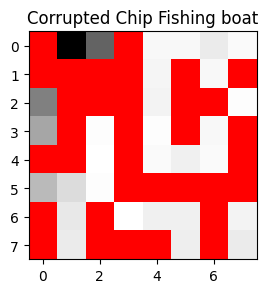

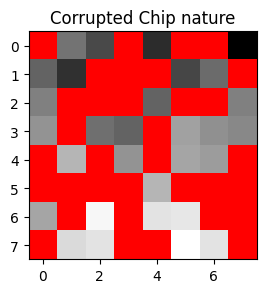

In [60]:
# Assuming 'chip1' is the original 8x8 block
corrupt_chip3 = corrupt_chip(chip1, 30)

# Generate a masked array where True indicates a NaN (corrupted) value
masked_array = np.ma.array(corrupt_chip3, mask=np.isnan(corrupt_chip3))

# Plot the corrupted chip with red for NaNs
plt.figure(figsize=(10, 5))
cmap = plt.cm.gray
cmap.set_bad('red', 1.0)
plt.subplot(1, 3, 2)
plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.title('Corrupted Chip Fishing boat')

# Assuming 'chip1' is the original 8x8 block
corrupt_chip4 = corrupt_chip(chip2, 30)

# Generate a masked array where True indicates a NaN (corrupted) value
masked_array = np.ma.array(corrupt_chip4, mask=np.isnan(corrupt_chip4))

# Plot the corrupted chip with red for NaNs
plt.figure(figsize=(10, 5))
cmap = plt.cm.gray
cmap.set_bad('red', 1.0)
plt.subplot(1, 3, 2)
plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.title('Corrupted Chip nature')

1. e) Display your 8×8 block (chip) with S = 10 sensed pixels

Text(0.5, 1.0, 'Corrupted Chip nature')

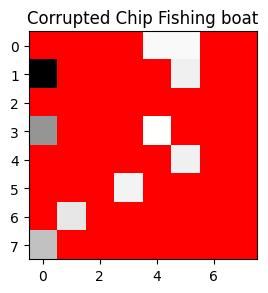

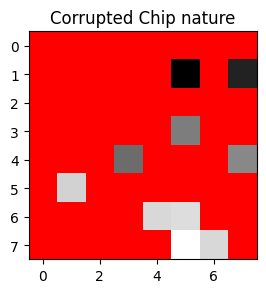

In [61]:
# Assuming 'chip1' is the original 8x8 block
corrupt_chip5 = corrupt_chip(chip1, 10)

# Generate a masked array where True indicates a NaN (corrupted) value
masked_array = np.ma.array(corrupt_chip5, mask=np.isnan(corrupt_chip5))

# Plot the corrupted chip with red for NaNs
plt.figure(figsize=(10, 5))
cmap = plt.cm.gray
cmap.set_bad('red', 1.0)
plt.subplot(1, 3, 2)
plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.title('Corrupted Chip Fishing boat')

# Assuming 'chip1' is the original 8x8 block
corrupt_chip6 = corrupt_chip(chip2, 10)

# Generate a masked array where True indicates a NaN (corrupted) value
masked_array = np.ma.array(corrupt_chip6, mask=np.isnan(corrupt_chip6))

# Plot the corrupted chip with red for NaNs
plt.figure(figsize=(10, 5))
cmap = plt.cm.gray
cmap.set_bad('red', 1.0)
plt.subplot(1, 3, 2)
plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
plt.title('Corrupted Chip nature')

### Question 2

In [62]:
def create_basis_chip(P, Q, u, v):
    # Adjust alpha and beta for one-based indexing
    alpha_u = np.sqrt(1.0 / P) if u == 1 else np.sqrt(2.0 / P)
    beta_v = np.sqrt(1.0 / Q) if v == 1 else np.sqrt(2.0 / Q)
    # Create the basis chip for the given u, v using one-based indexing
    basis_chip = np.zeros((P, Q))
    for x in range(1, P + 1):
        for y in range(1, Q + 1):
            basis_chip[x - 1, y - 1] = (
             alpha_u * beta_v *
                np.cos(np.pi * ((2*x)-1) * (u - 1) / (2.0 * P)) *
                np.cos(np.pi * ((2 *y)-1) * (v - 1) / (2.0 * Q))
            )
    return basis_chip


In [19]:
def create_basis_chip(P, Q, u, v):
    # Adjust alpha and beta for one-based indexing
    alpha_u = np.sqrt(1.0 / P) if u == 1 else np.sqrt(2.0 / P)
    beta_v = np.sqrt(1.0 / Q) if v == 1 else np.sqrt(2.0 / Q)
    # Create the basis chip for the given u, v using one-based indexing
    basis_chip = np.zeros((P, Q))
    for x in range(1, P + 1):
        for y in range(1, Q + 1):
            basis_chip[x - 1, y - 1] = (
             alpha_u * beta_v *
                np.cos(np.pi * ((2*x)-1) * (u - 1) / (2.0 * P)) *
                np.cos(np.pi * ((2 *y)-1) * (v - 1) / (2.0 * Q))
            )
    return basis_chip

2 a)Display the basis chip for (u, v) = (3, 4)

2 b)Display the basis chip for (u, v) = (5, 2)

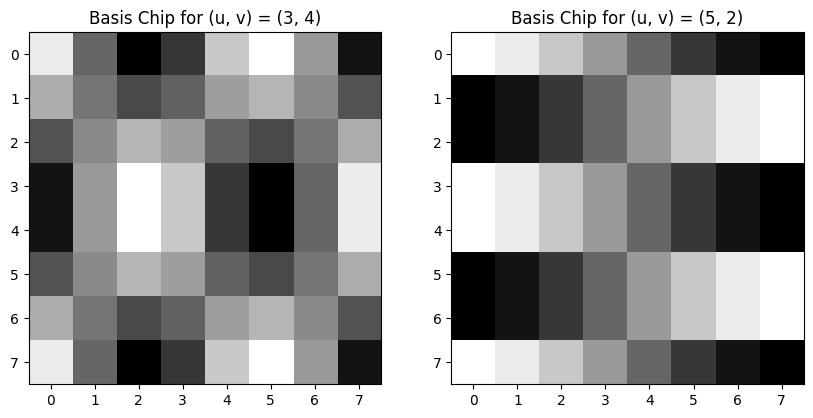

In [63]:
chip_3_4 = create_basis_chip(8,8,3,4)
chip_5_2 = create_basis_chip(8,8,5,2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(chip_3_4, cmap='gray')
axes[0].set_title("Basis Chip for (u, v) = (3, 4)")
axes[1].imshow(chip_5_2, cmap='gray')
axes[1].set_title("Basis Chip for (u, v) = (5, 2)")
plt.show()

2 c) Display the 82 × 82 = 64 × 64 basis vector matrix.

In [64]:
def rasterize_matrix(matrix):
    return matrix.flatten()

In [20]:
def create_basis_vector_matrix(size=16):
    num_chips = size * size
    basis_vector_matrix = np.zeros((num_chips, num_chips))
    # Filling the basis vector matrix
    for u in range(1, size + 1):
        for v in range(1, size + 1):
            # Create basis chip for each (u, v) pair using one-based indexing
            basis_chip = create_basis_chip(size, size, u, v)
            # Flatten the basis chip to be a column in the basis vector matrix
            column_index = (u - 1) * size + (v - 1)
            basis_vector_matrix[:, column_index] = basis_chip.flatten('F')

    return basis_vector_matrix

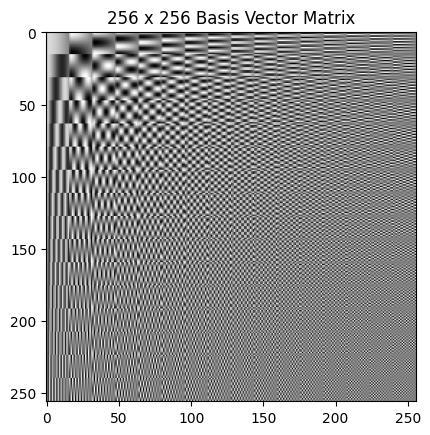

In [22]:
basis_vector_matrix = create_basis_vector_matrix()
plt.imshow(basis_vector_matrix, cmap='gray')
plt.title("256 x 256 Basis Vector Matrix")
plt.show()

### Question 3 for Fishing Boat

In [67]:
# Flatten the image and create a mask for sensed pixels
def flatten_and_mask(chip):
    flat_chip = chip.flatten()
    print(flat_chip.shape)
    mask = ~np.isnan(flat_chip)
    return flat_chip[mask][:,],flat_chip[~mask][:,], mask  # Reshape to [30, 1]

In [68]:
# Flatten the corrupted image and get the mask
flattened_chip1, mask = flatten_and_mask(corrupt_chip3)
print(flattened_chip1.shape)

(64,)
(30,)


In [69]:
print(basis_vector_matrix.shape)
sensed_basis_matrix = basis_vector_matrix[mask,:]
not_sensed_mask = ~mask
not_sensed_basis_matrix = basis_vector_matrix[not_sensed_mask, :]
print(sensed_basis_matrix.shape)
print(not_sensed_basis_matrix.shape)

(64, 64)
(30, 64)
(34, 64)


In [70]:
def get_w0(c,b):
    w0=(c/b[0])
    return w0

### Mini Project 1 Check-in

2 a) Here lamda = np.logspace(-3, 7, 11)
Plot for each of the 10 values of λ , display the reconstructed sensed image chip alongside the original sensed (corrupted) image chip, as well as the model weights via a stem plot is shown.

In [71]:
def lasso_cross_validation(num_subsets, lambda_range, test_size=6):
    # num_subsets = 1
    # test_size = 6  #(30/5)
    # lambda_range = np.logspace(-3, 7, 11)

    mse_per_lambda = {alpha: [] for alpha in lambda_range}

    # Perform cross-validation
    for subset in range(num_subsets):
        # Randomly split the data into training and testing sets
        indices = np.arange(sensed_basis_matrix.shape[0])
        test_indices = np.random.choice(indices, size=test_size, replace=False)
        train_indices = np.setdiff1d(indices, test_indices)
        
        X_train, X_test = sensed_basis_matrix[train_indices], sensed_basis_matrix[test_indices]
        y_train, y_test = flattened_chip1[train_indices], flattened_chip1[test_indices]
        
        # Iterate over each lambda value
        for alpha in lambda_range:
            # Fit a LASSO model with the current lambda
            model = Lasso(alpha=alpha, max_iter=1000000)
            model.fit(X_train[:,1:], y_train)
            
            # Predict on the test set
            y_pred = model.predict(X_test[:,1:])

            #calculate the weights
            w0=get_w0(model.intercept_,X_train[:,0])
            dct_coeff=np.array(model.coef_)
            dct_coeff=np.insert(dct_coeff,0,w0)

            coefficients = np.zeros(sensed_basis_matrix.shape[1])
            coefficients[1:] = model.coef_
            coefficients[0] = model.intercept_
            # Calculate and store MSE for this subset and lambda
            mse = mean_squared_error(y_test, y_pred)
            mse_per_lambda[alpha].append(mse)

            #display reconstructed image along with the original corrupted image
            reconstructed_image = model.predict(not_sensed_basis_matrix[:,1:])

            #create a 64x1 array with zeros
            reconstructed_image_full = np.zeros((64,))
            reconstructed_image_full[mask] = flattened_chip1
            reconstructed_image_full[not_sensed_mask] = reconstructed_image
            reconstructed_image = reconstructed_image_full.reshape(8, 8)

            
            print(reconstructed_image.shape)
            
            # show subplots side by side
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 4, 1)
            plt.imshow(reconstructed_image, cmap='gray')
            plt.title(f"Reconstructed Image for\n lambda = {alpha}")
            plt.subplot(1, 4, 2)
            masked_array = np.ma.array(corrupt_chip3, mask=np.isnan(corrupt_chip3))
            cmap = plt.cm.gray
            cmap.set_bad('red', 1.0)
            plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
            plt.title('Corrupted Chip')
            plt.imshow(corrupt_chip3, cmap='gray')
            plt.title('Corrupted Chip')
            plt.subplot(1, 4, 3)
            plt.imshow(chip1, cmap='gray')
            plt.title('Original Chip')
            plt.subplot(1, 4, 4)
            plt.stem(coefficients)
            plt.title("Model Weights")
            plt.show()
    return mse_per_lambda

(8, 8)


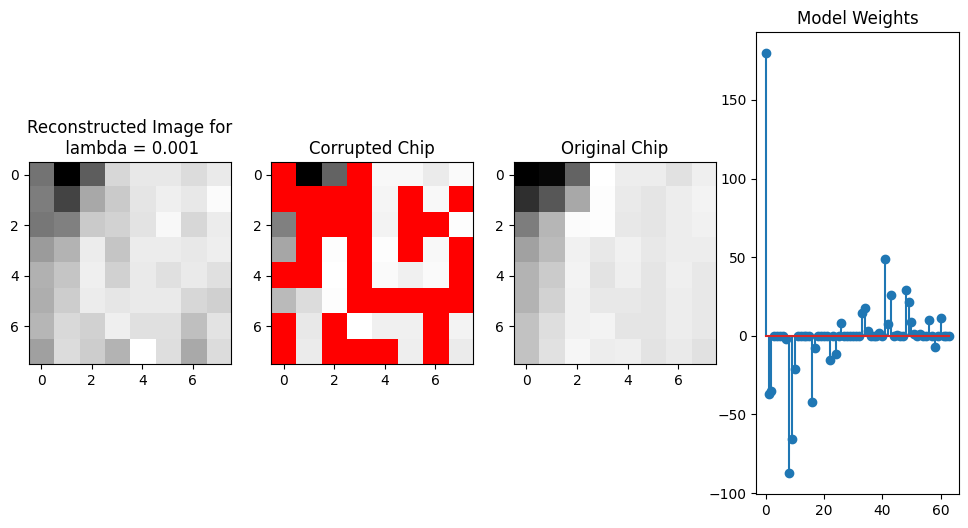

(8, 8)


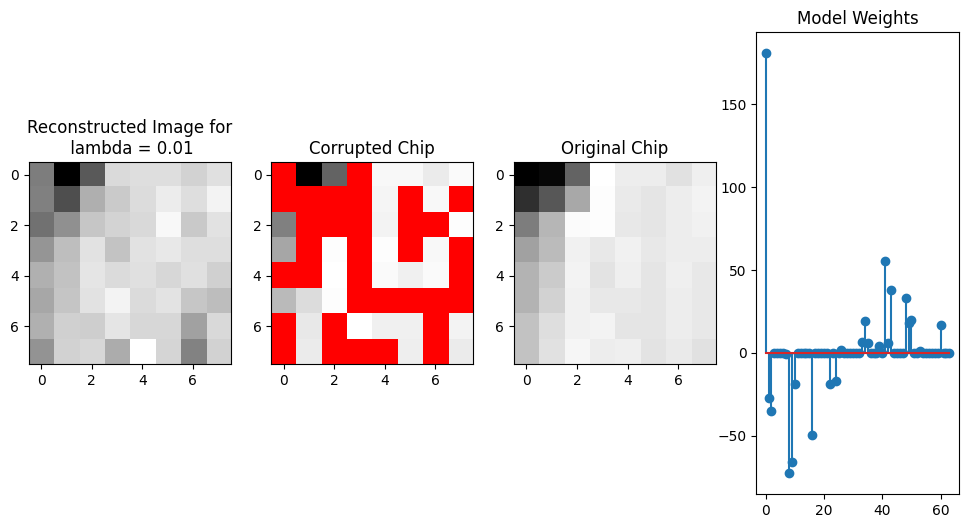

(8, 8)


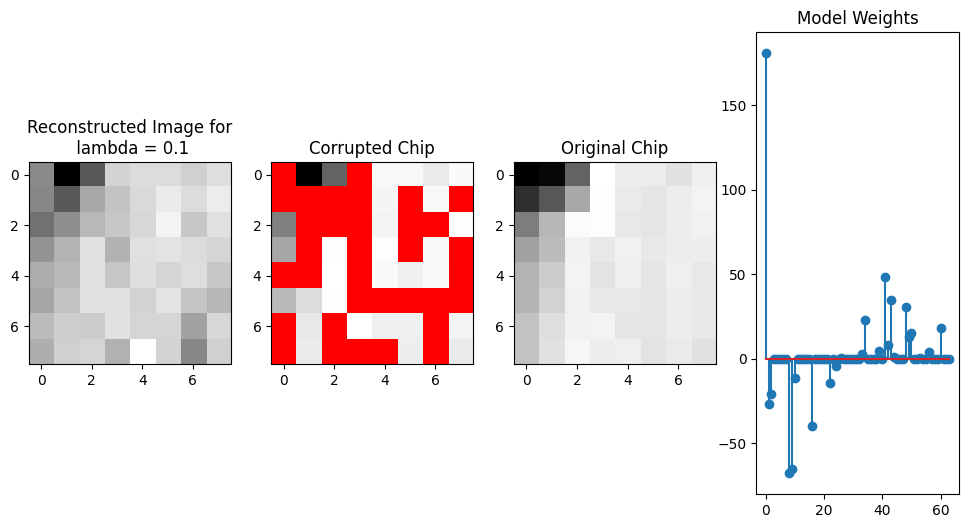

(8, 8)


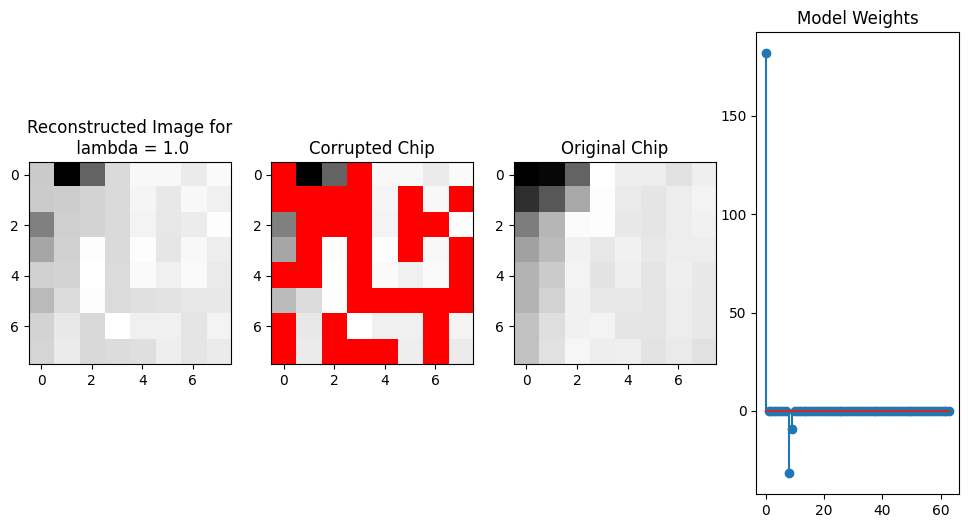

(8, 8)


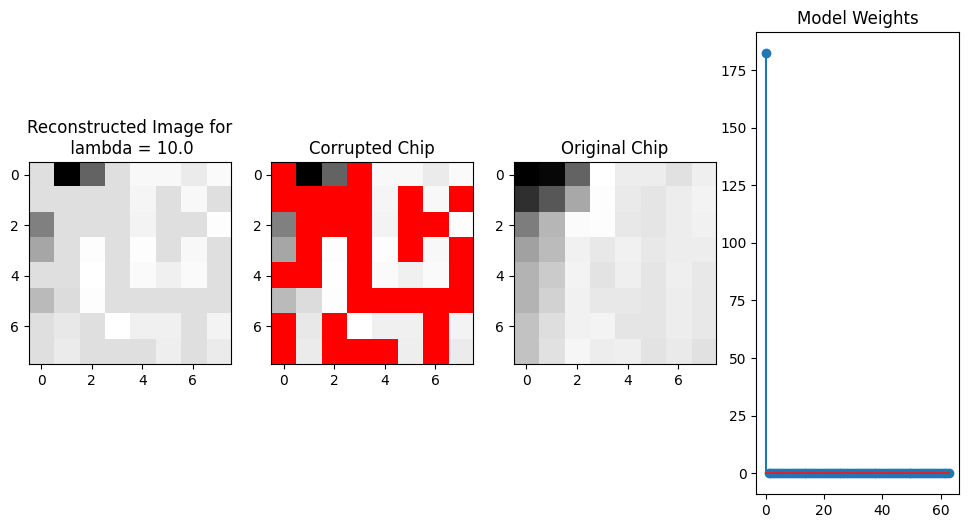

(8, 8)


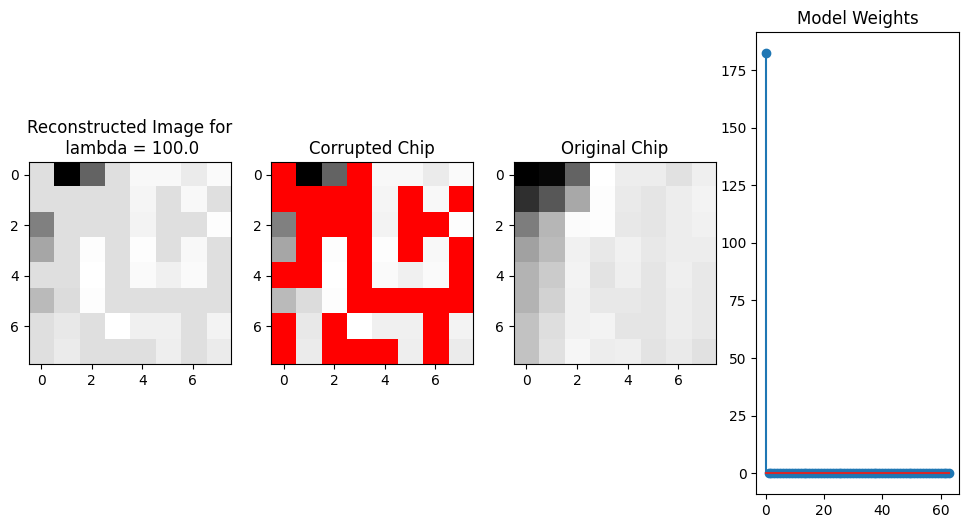

(8, 8)


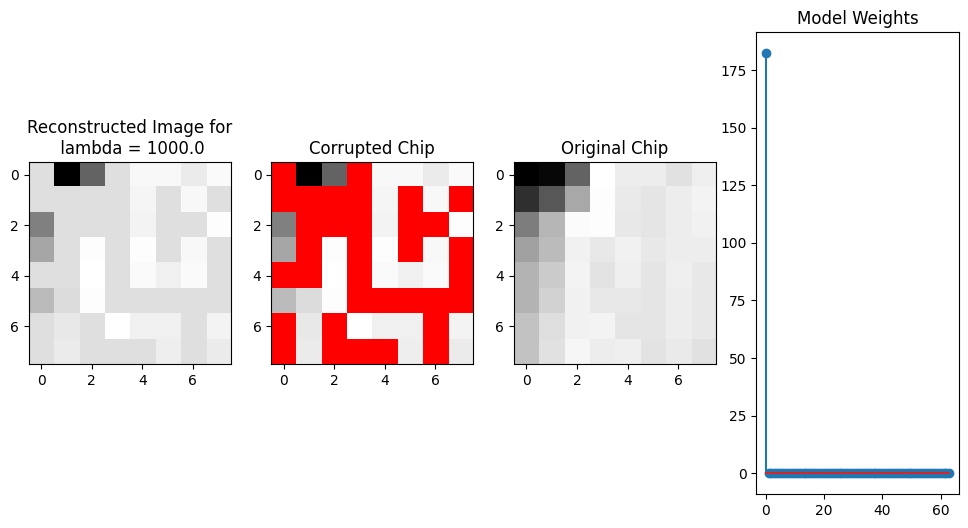

(8, 8)


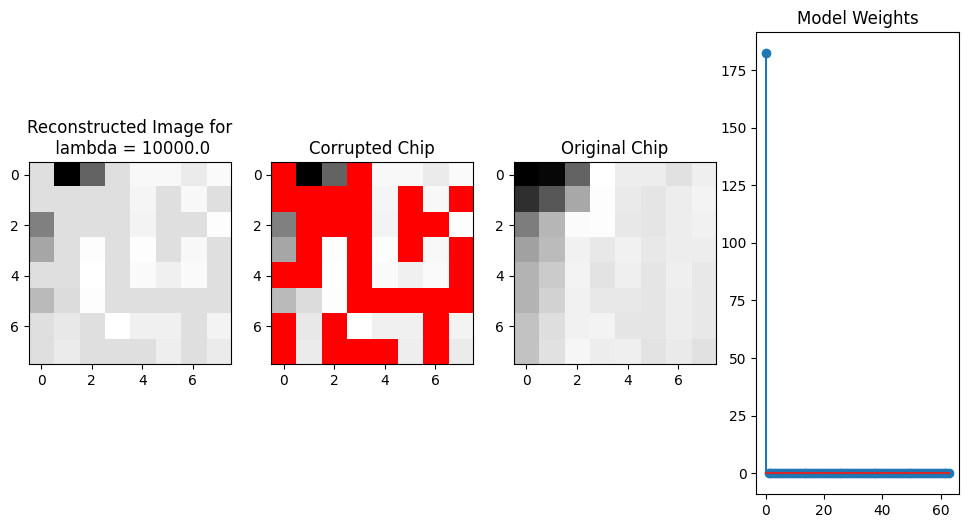

(8, 8)


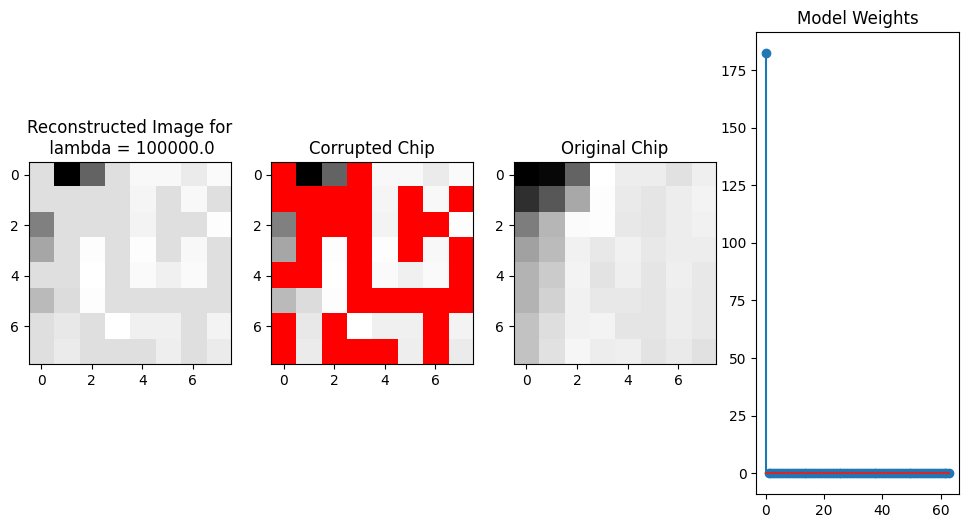

(8, 8)


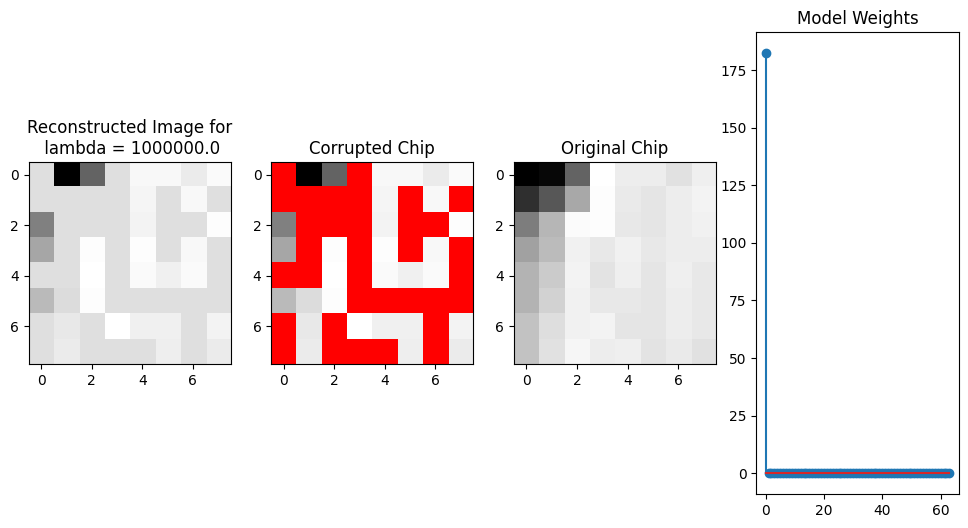

(8, 8)


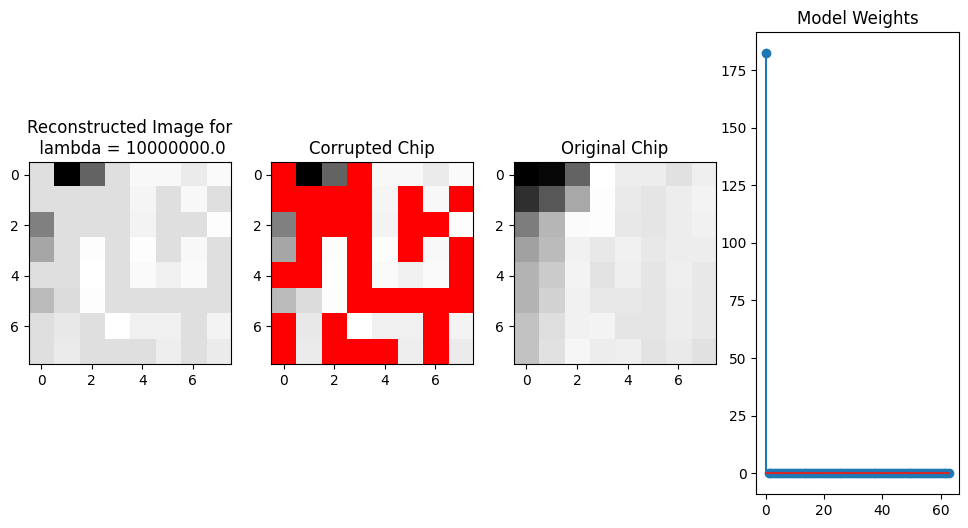

In [72]:
mse_per_lambda= lasso_cross_validation(1, np.logspace(-3, 7, 11))

2)b) 

With a small λ (0.001 and 0.01), the reconstructed images appear more detailed and closer to the original chip. This is because a smaller λ imposes less regularization, allowing the LASSO model to fit the data more closely and capture more nuances in the image. However, there's a risk of overfitting, as the model may start to capture noise in the data. As λ increases (0.1 and 1.0), the reconstructed images become increasingly blurred or less detailed. This indicates that the regularization is smoothing out the reconstruction, potentially underfitting the data and losing some important details.

With a very large λ (10.0, 100.0 etc), the reconstructed images become almost uniform, and the details are completely lost. This level of regularization is too strong and dominates the objective function, leading to underfitting where the model fails to capture the underlying structure of the data at all.

With respect to Model Weights (DCT Coefficients):

For lower λ values, the stem plots show that many coefficients are non-zero and have larger magnitudes. This suggests that the model is using more features (basis functions) to explain the data, which corresponds to a more complex model. With increasing λ values, the stem plots demonstrate sparser solutions, meaning fewer non-zero coefficients. The coefficients that remain tend to have smaller absolute values. This is a signature effect of LASSO, which performs feature selection by shrinking some coefficients to exactly zero, thereby simplifying the model.

At high λ values, the stem plots show that almost all coefficients are shrunk towards zero, indicating a very sparse model. This extreme regularization leads to a loss of detail and a highly biased model.

Impact of Regularization:

When λ is too low, the regularization term has too little influence, and the model may overfit, capturing noise as if it were signal. This results in a detailed reconstruction but one that may not generalize well to new data. When λ is too high, the regularization term has too much influence, causing the model to underfit. This results in a reconstruction that may generalize well but at the cost of losing important details, resulting in a poor-quality reconstruction. An optimal λ strikes a balance between fit and complexity, providing a reconstruction that captures the main features of the image without fitting to noise.


2c) Avg MSE as a function of lamda

{0.001: [327.81040779954674], 0.01: [489.5192686223488], 0.1: [456.2306566940235], 1.0: [412.1942301617259], 10.0: [474.5572916666667], 100.0: [474.5572916666667], 1000.0: [474.5572916666667], 10000.0: [474.5572916666667], 100000.0: [474.5572916666667], 1000000.0: [474.5572916666667], 10000000.0: [474.5572916666667]}


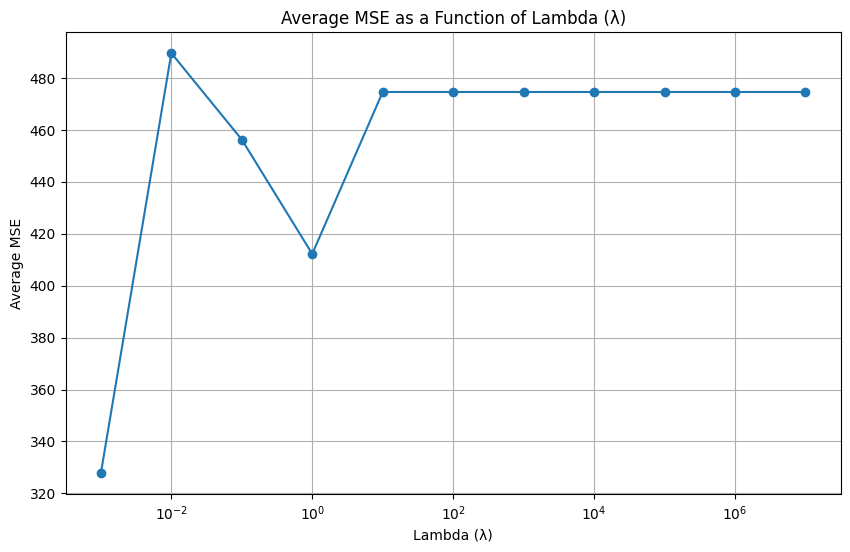

In [73]:
print(mse_per_lambda)
lambda_values = sorted(mse_per_lambda.keys())
average_mse_values = [np.mean(mse_per_lambda[l]) for l in lambda_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, average_mse_values, marker='o')
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('Lambda (λ)')
plt.ylabel('Average MSE')
plt.title('Average MSE as a Function of Lambda (λ)')
plt.grid(True)
plt.show()

2 d) Doing the same for 20 subsets

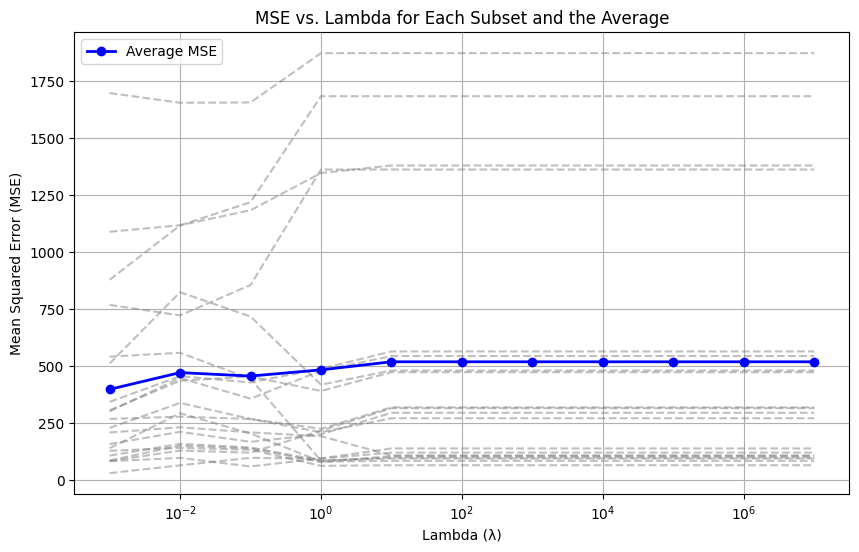

In [74]:
num_subsets = 20
test_size = 6  # Number of pixels in the test set for each subset
lambda_range = np.logspace(-3, 7, 11)

# Initialize an array to store MSE for each lambda and each subset
mse_results = np.zeros((len(lambda_range), num_subsets))

# Perform cross-validation
for subset in range(num_subsets):
    # Randomly split the data into training and testing sets
    indices = np.arange(sensed_basis_matrix.shape[0])
    test_indices = np.random.choice(indices, size=test_size, replace=False)
    train_indices = np.setdiff1d(indices, test_indices)
    
    X_train, X_test = sensed_basis_matrix[train_indices], sensed_basis_matrix[test_indices]
    y_train, y_test = flattened_chip1[train_indices], flattened_chip1[test_indices]
    
    # Iterate over each lambda value
    for idx, alpha in enumerate(lambda_range):
        # Fit a LASSO model with the current lambda
        model = Lasso(alpha=alpha, max_iter=1000000)
        model.fit(X_train[:,1:], y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test[:,1:])

        # Calculate and store MSE for this subset and lambda
        mse = mean_squared_error(y_test, y_pred)
        mse_results[idx, subset] = mse

# Calculate average MSE across all subsets for each lambda
average_mse = np.mean(mse_results, axis=1)

# Plot MSE vs. lambda for each subset and the average
plt.figure(figsize=(10, 6))
for subset in range(num_subsets):
    plt.plot(lambda_range, mse_results[:, subset], alpha=0.5, linestyle='--', color='gray')  # Individual MSE curves

# Highlight the average MSE curve
plt.plot(lambda_range, average_mse, 'b-', linewidth=2, marker='o', label='Average MSE')  # Average MSE curve

plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Lambda for Each Subset and the Average')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
#optimal lambda that minimizes the cross-validated MSE
optimal_lambda = lambda_range[np.argmin(average_mse)]
print(f"Optimal lambda (λ) that minimizes the cross-validated MSE: {optimal_lambda}")

Optimal lambda (λ) that minimizes the cross-validated MSE: 0.001


(8, 8)


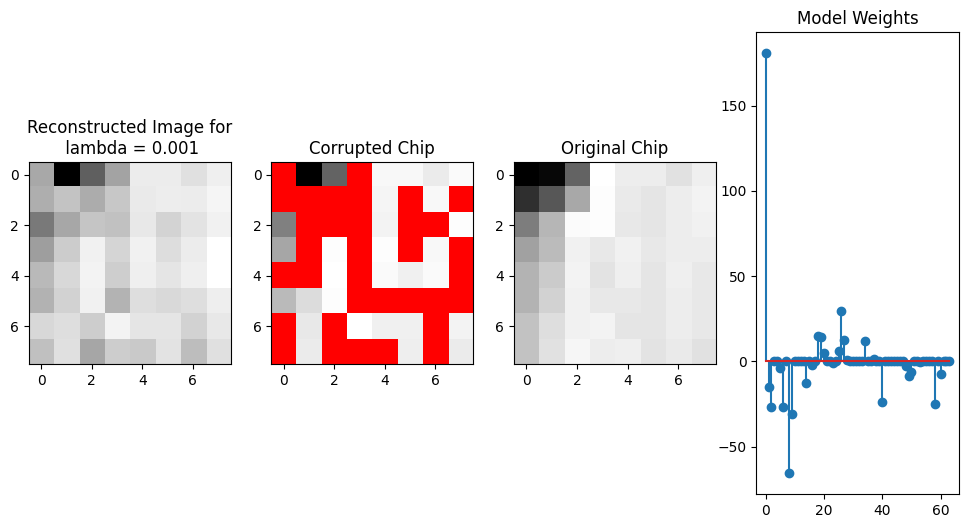

In [76]:
mse_per_lambda= lasso_cross_validation(1, [optimal_lambda])

### Doing same for Nature Image

In [77]:
flattened_chip2, mask = flatten_and_mask(corrupt_chip4)
print(mask.shape)

(64,)
(64,)


In [78]:
print(basis_vector_matrix.shape)
sensed_basis_matrix = basis_vector_matrix[mask,:]
not_sensed_mask = ~mask
not_sensed_basis_matrix = basis_vector_matrix[not_sensed_mask, :]

(64, 64)


In [79]:
def lasso_cross_validation(num_subsets, lambda_range, test_size=6):
    # num_subsets = 1
    # test_size = 6  #(30/5)
    # lambda_range = np.logspace(-3, 7, 11)

    mse_per_lambda = {alpha: [] for alpha in lambda_range}

    # Perform cross-validation
    for subset in range(num_subsets):
        # Randomly split the data into training and testing sets
        indices = np.arange(sensed_basis_matrix.shape[0])
        test_indices = np.random.choice(indices, size=test_size, replace=False)
        train_indices = np.setdiff1d(indices, test_indices)
        
        X_train, X_test = sensed_basis_matrix[train_indices], sensed_basis_matrix[test_indices]
        y_train, y_test = flattened_chip2[train_indices], flattened_chip2[test_indices]
        
        # Iterate over each lambda value
        for alpha in lambda_range:
            # Fit a LASSO model with the current lambda
            model = Lasso(alpha=alpha, max_iter=1000000)
            model.fit(X_train[:,1:], y_train)
            
            # Predict on the test set
            y_pred = model.predict(X_test[:,1:])

            #calculate the weights
            w0=get_w0(model.intercept_,X_train[:,0])
            dct_coeff=np.array(model.coef_)
            dct_coeff=np.insert(dct_coeff,0,w0)

            coefficients = np.zeros(sensed_basis_matrix.shape[1])
            coefficients[1:] = model.coef_
            coefficients[0] = model.intercept_
            # Calculate and store MSE for this subset and lambda
            mse = mean_squared_error(y_test, y_pred)
            mse_per_lambda[alpha].append(mse)

            #display reconstructed image along with the original corrupted image
            reconstructed_image = np.dot(basis_vector_matrix, dct_coeff)
            reconstructed_image = np.reshape(reconstructed_image, (8, 8))
            
            # show subplots side by side
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 4, 1)
            plt.imshow(reconstructed_image, cmap='gray')
            plt.title(f"Reconstructed Image for\n lambda = {alpha}")
            plt.subplot(1, 4, 2)
            masked_array = np.ma.array(corrupt_chip4, mask=np.isnan(corrupt_chip3))
            cmap = plt.cm.gray
            cmap.set_bad('red', 1.0)
            plt.imshow(masked_array, cmap=cmap, interpolation='nearest')
            plt.title('Corrupted Chip')
            plt.imshow(corrupt_chip3, cmap='gray')
            plt.title('Corrupted Chip')
            plt.subplot(1, 4, 3)
            plt.imshow(chip2, cmap='gray')
            plt.title('Original Chip')
            plt.subplot(1, 4, 4)
            plt.stem(coefficients)
            plt.title("Model Weights")
            plt.show()
    return mse_per_lambda

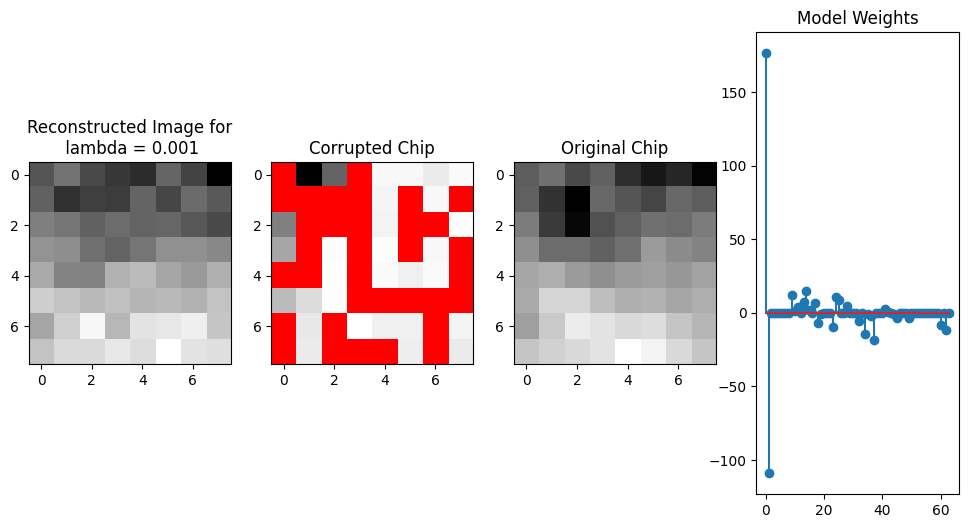

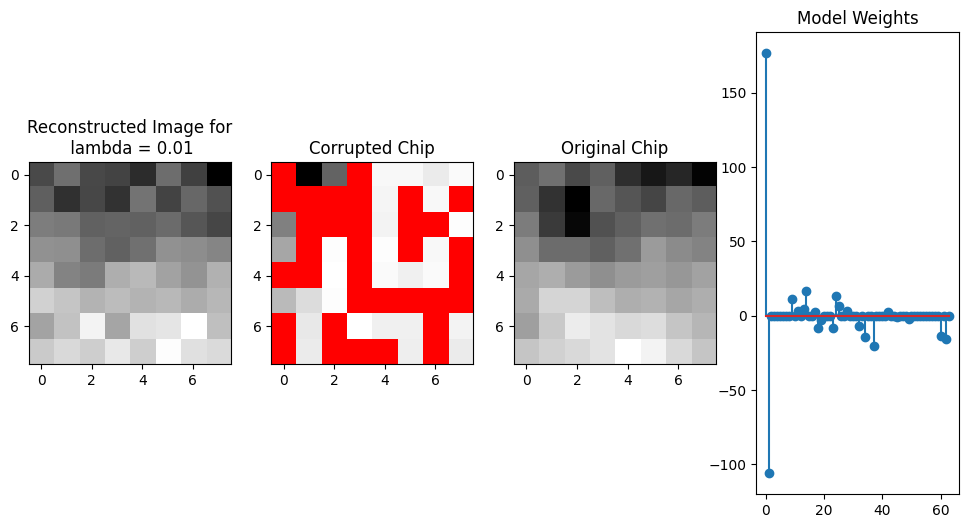

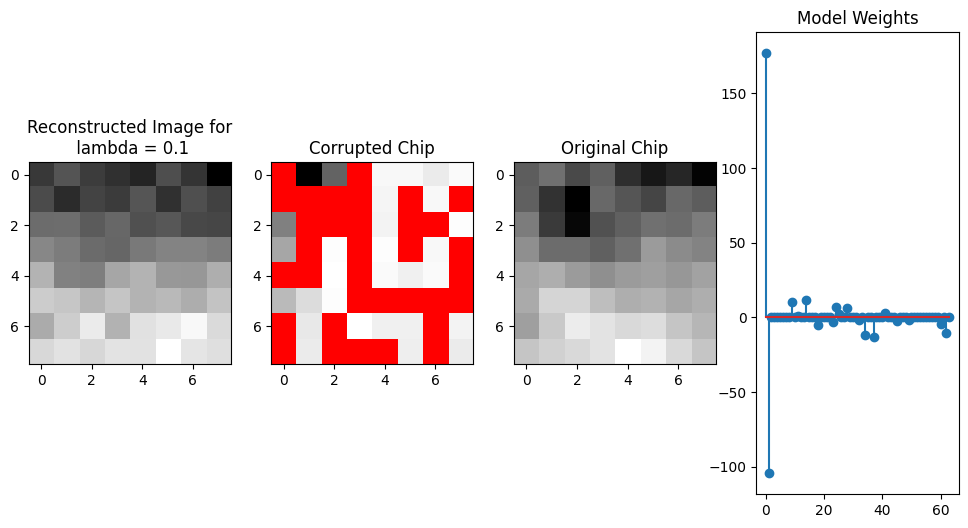

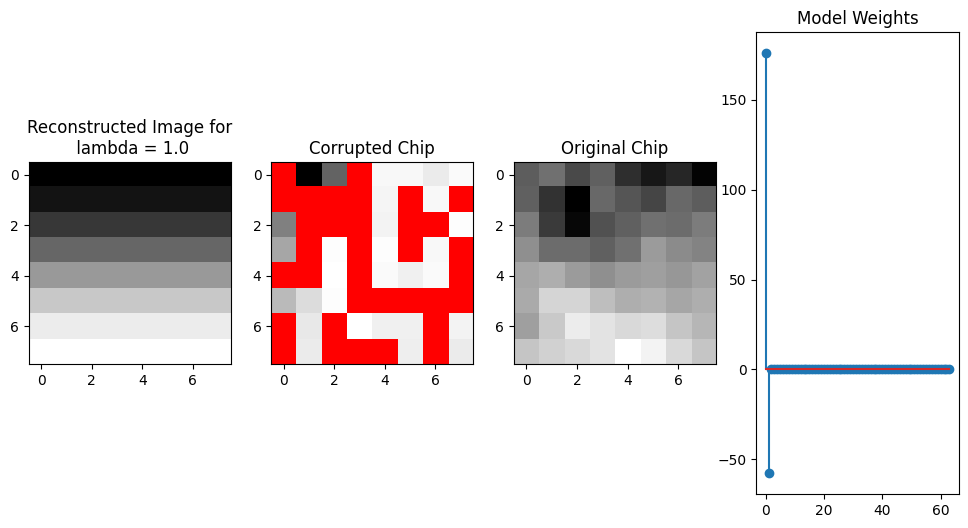

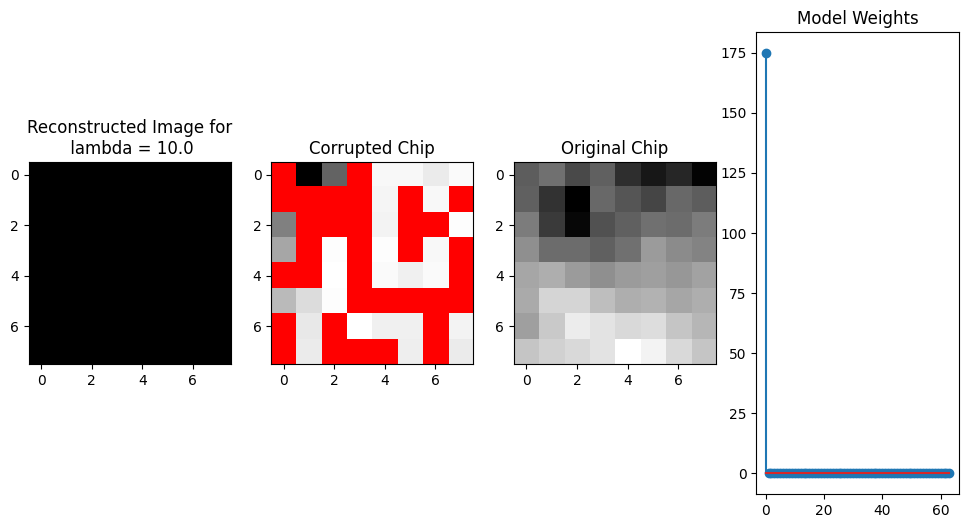

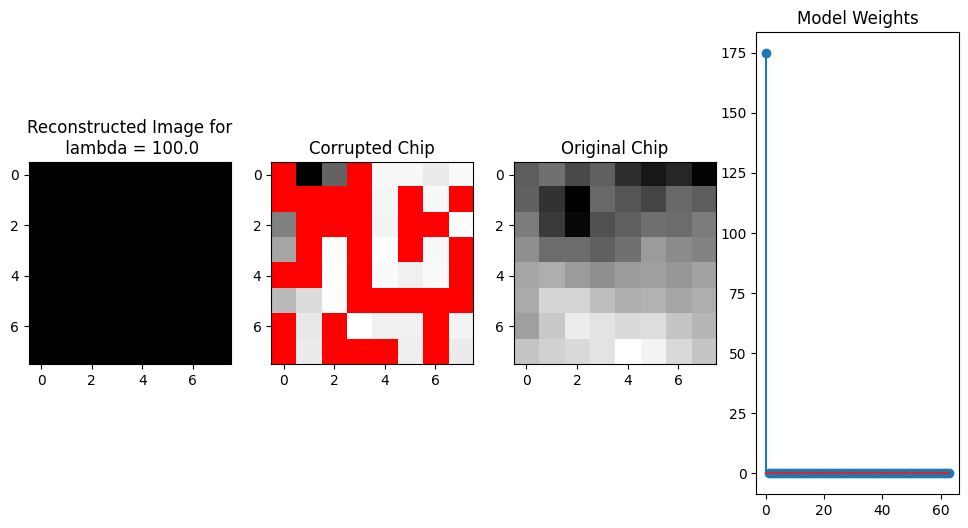

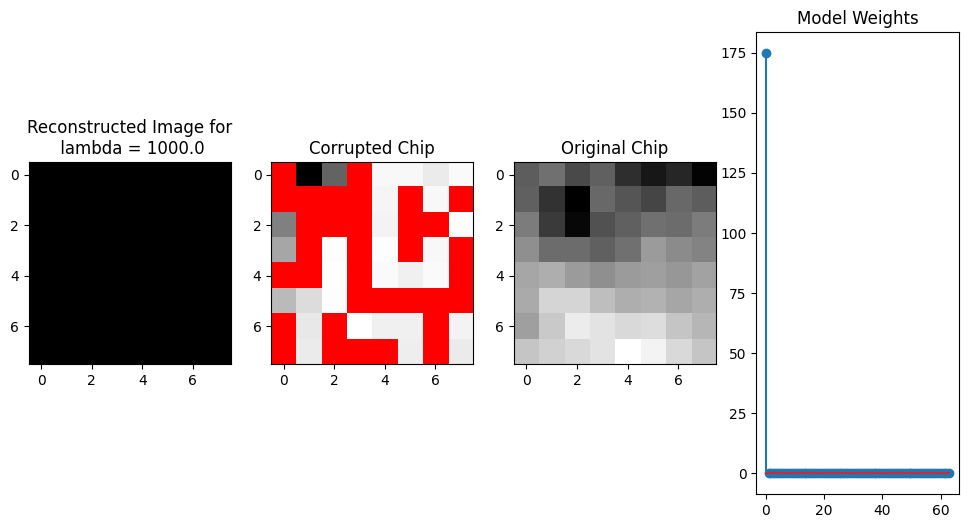

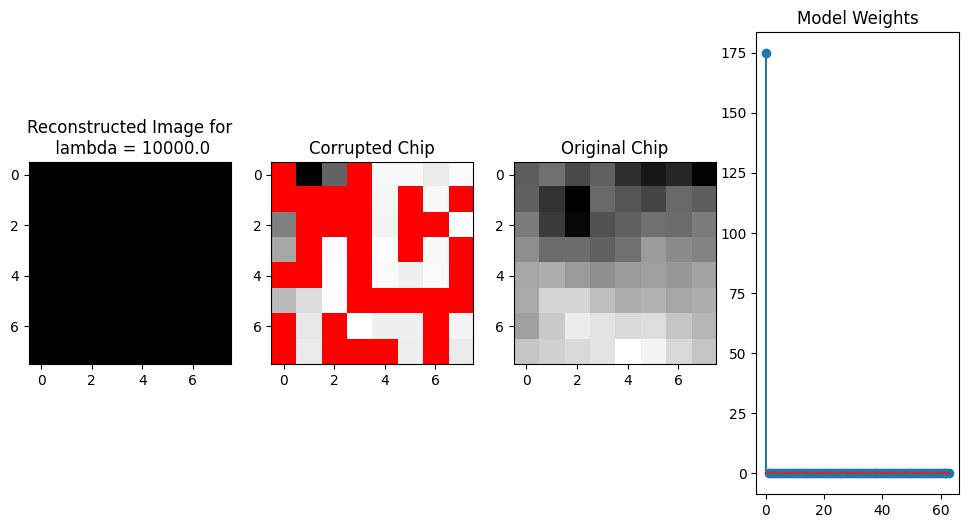

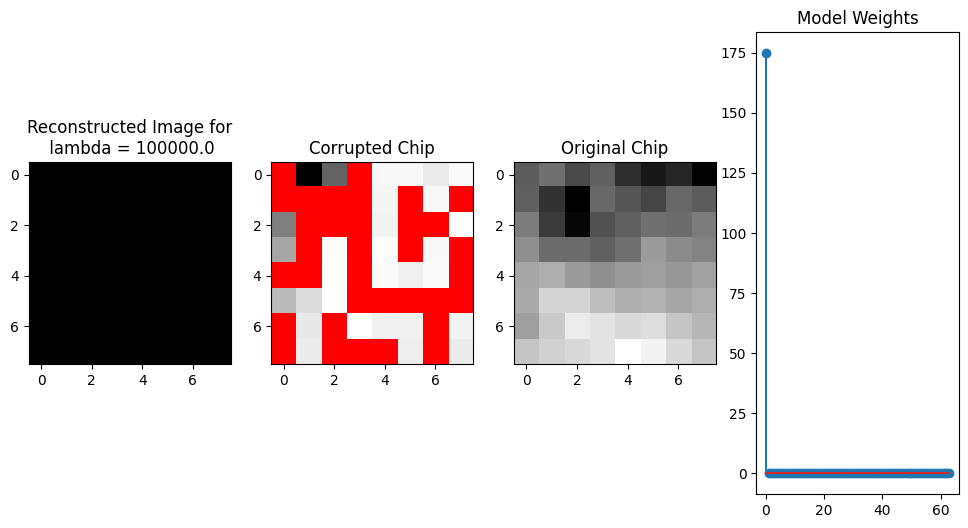

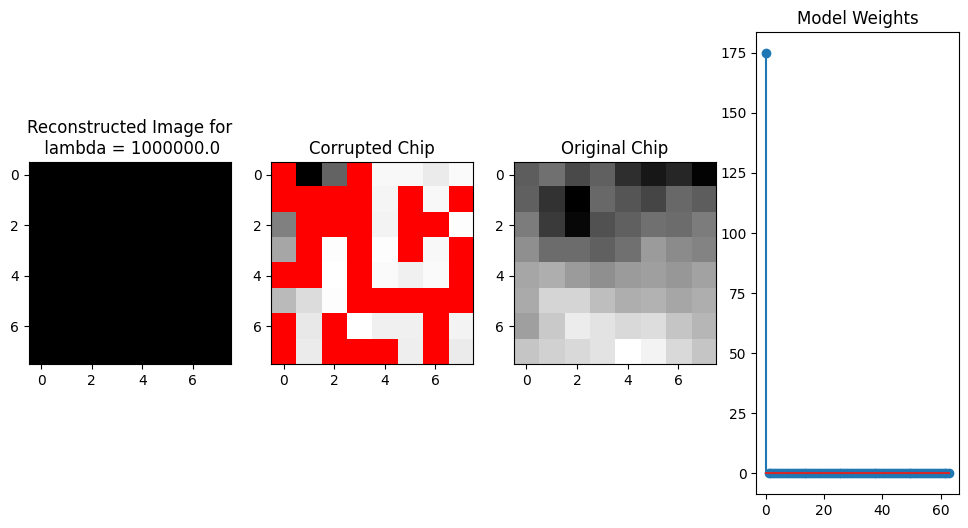

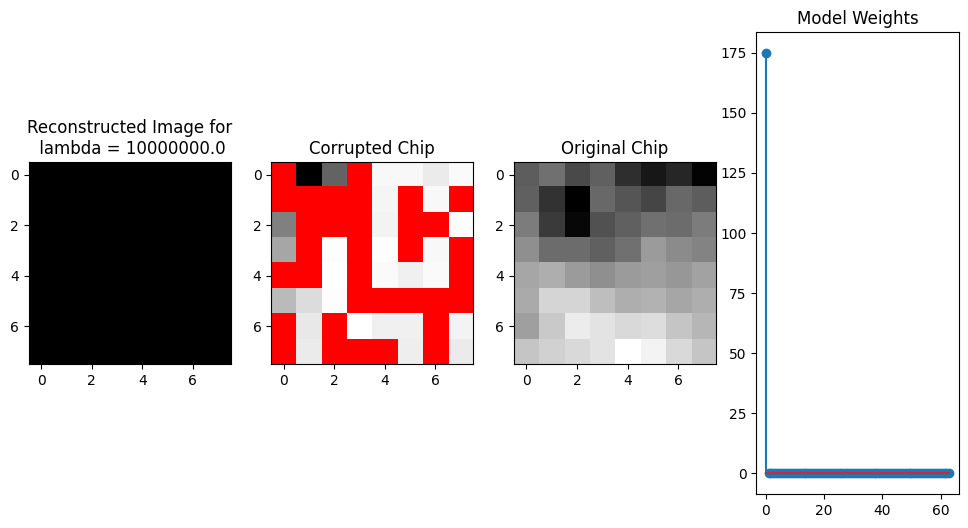

In [80]:
mse_per_lambda= lasso_cross_validation(1, np.logspace(-3, 7, 11))

{0.001: [65.3328813172656], 0.01: [65.18116205247507], 0.1: [43.65586978897307], 1.0: [33.52007772370627], 10.0: [101.91840277777793], 100.0: [101.91840277777793], 1000.0: [101.91840277777793], 10000.0: [101.91840277777793], 100000.0: [101.91840277777793], 1000000.0: [101.91840277777793], 10000000.0: [101.91840277777793]}


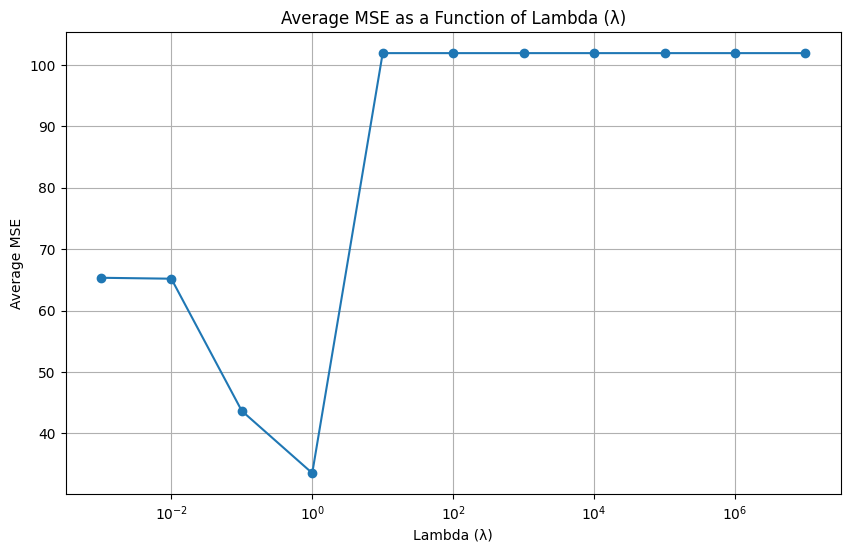

In [81]:
print(mse_per_lambda)
lambda_values = sorted(mse_per_lambda.keys())
average_mse_values = [np.mean(mse_per_lambda[l]) for l in lambda_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, average_mse_values, marker='o')
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.xlabel('Lambda (λ)')
plt.ylabel('Average MSE')
plt.title('Average MSE as a Function of Lambda (λ)')
plt.grid(True)
plt.show()

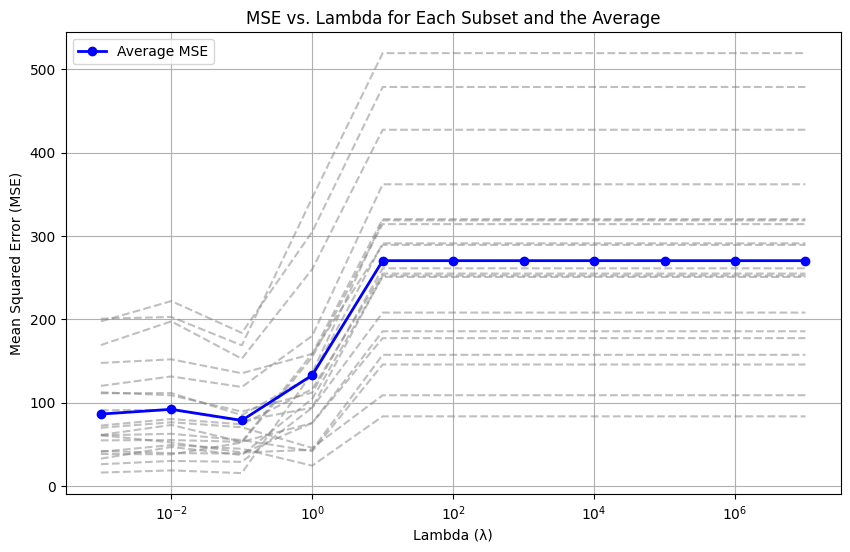

In [82]:
num_subsets = 20
test_size = 6  # Number of pixels in the test set for each subset
lambda_range = np.logspace(-3, 7, 11)

# Initialize an array to store MSE for each lambda and each subset
mse_results = np.zeros((len(lambda_range), num_subsets))

# Perform cross-validation
for subset in range(num_subsets):
    # Randomly split the data into training and testing sets
    indices = np.arange(sensed_basis_matrix.shape[0])
    test_indices = np.random.choice(indices, size=test_size, replace=False)
    train_indices = np.setdiff1d(indices, test_indices)
    
    X_train, X_test = sensed_basis_matrix[train_indices], sensed_basis_matrix[test_indices]
    y_train, y_test = flattened_chip2[train_indices], flattened_chip2[test_indices]
    
    # Iterate over each lambda value
    for idx, alpha in enumerate(lambda_range):
        # Fit a LASSO model with the current lambda
        model = Lasso(alpha=alpha, max_iter=1000000)
        model.fit(X_train[:,1:], y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test[:,1:])

        # Calculate and store MSE for this subset and lambda
        mse = mean_squared_error(y_test, y_pred)
        mse_results[idx, subset] = mse

# Calculate average MSE across all subsets for each lambda
average_mse = np.mean(mse_results, axis=1)

# Plot MSE vs. lambda for each subset and the average
plt.figure(figsize=(10, 6))
for subset in range(num_subsets):
    plt.plot(lambda_range, mse_results[:, subset], alpha=0.5, linestyle='--', color='gray')  # Individual MSE curves

# Highlight the average MSE curve
plt.plot(lambda_range, average_mse, 'b-', linewidth=2, marker='o', label='Average MSE')  # Average MSE curve

plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Lambda for Each Subset and the Average')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
#optimal lambda that minimizes the cross-validated MSE
optimal_lambda = lambda_range[np.argmin(average_mse)]
print(f"Optimal lambda (λ) that minimizes the cross-validated MSE: {optimal_lambda}")

Optimal lambda (λ) that minimizes the cross-validated MSE: 0.1


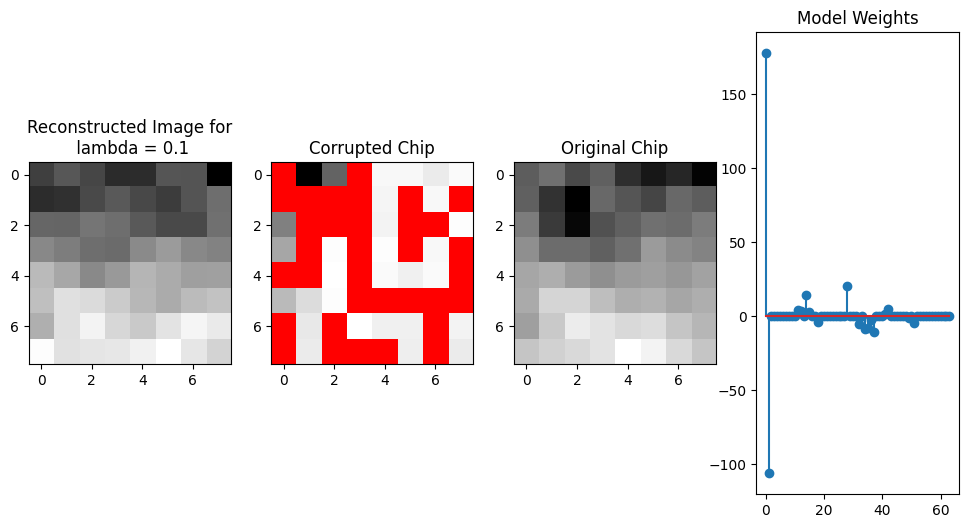

In [84]:
mse_per_lambda= lasso_cross_validation(1, [optimal_lambda])